### This notebook examines the statistics of labeled data from the Sitkin Volcano, going through the standard steps of building a classic ML model:<br>
*Exploratory Data Analysis <br>
*Dimensionality Reduction <br>
*Model Selection and Training

### Notebook is Running on this Data:
Sensor : AV.GSTD.*.BHN <br>
Start Date : 2021-04-06T00:00:00 to <br>
Number of Days : 100 <br>
Eruption Time : 2021-05-26T05:04:00

#### ! Before running, make sure to run the Download Data, Data Cleaning, and Prepare AI Ready Data notebooks in order

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, \
    fowlkes_mallows_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
filepath = '/'.join(os.getcwd().split('/')[0:-1]) + '/data/ai_ready/statistics.csv'
df = pd.read_csv(filepath_or_buffer=filepath)
df.head(3)

,mean,max,min,median,range,std,var,spec_mean,spec_max,spec_min,...,spec_std,spec_var,speclog_mean,speclog_max,speclog_min,speclog_median,speclog_range,speclog_std,speclog_var,state
0,-2.045739,1659.079530,-1318.335883,-6.963337,2977.415414,371.791134,138228.647271,10.392417,995.277247,0.004666,...,31.456352,989.502099,0.433941,2.997944,-2.331057,0.297929,5.329001,0.661548,0.437646,before
1,-43.245231,1800.918051,-1867.272921,-56.748376,3668.190972,476.115885,226686.335511,12.038669,1081.727088,0.010802,...,40.854324,1669.075788,0.473613,3.034118,-1.966483,0.329268,5.000601,0.658096,0.433090,before
2,-34.465366,2031.091640,-2252.112966,-32.267577,4283.204606,548.338617,300675.238931,12.984918,1236.088867,0.011445,...,49.401049,2440.463664,0.500578,3.092050,-1.941383,0.366436,5.033433,0.640550,0.410304,before


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mean            2400 non-null   float64
 1   max             2400 non-null   float64
 2   min             2400 non-null   float64
 3   median          2400 non-null   float64
 4   range           2400 non-null   float64
 5   std             2400 non-null   float64
 6   var             2400 non-null   float64
 7   spec_mean       2400 non-null   float64
 8   spec_max        2400 non-null   float64
 9   spec_min        2400 non-null   float64
 10  spec_median     2400 non-null   float64
 11  spec_range      2400 non-null   float64
 12  spec_std        2400 non-null   float64
 13  spec_var        2400 non-null   float64
 14  speclog_mean    2400 non-null   float64
 15  speclog_max     2400 non-null   float64
 16  speclog_min     2400 non-null   float64
 17  speclog_median  2400 non-null   f

In [4]:
df.describe()

,mean,max,min,median,range,std,var,spec_mean,spec_max,spec_min,...,spec_range,spec_std,spec_var,speclog_mean,speclog_max,speclog_min,speclog_median,speclog_range,speclog_std,speclog_var
count,2400.000000,2.400000e+03,2.400000e+03,2400.000000,2.400000e+03,2400.000000,2.400000e+03,2400.000000,2400.000000,2.400000e+03,...,2400.000000,2400.000000,2.400000e+03,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,2.453598,4.522963e+03,-4.893659e+03,1.483901,9.416623e+03,514.552034,1.996610e+06,11.006355,1229.630138,5.841155e-03,...,1229.624297,44.947855,6.406652e+03,0.324771,2.831938,-2.527280,0.193226,5.359219,0.655166,0.434066
std,170.565876,8.269226e+04,9.808335e+04,168.726517,1.807662e+05,1316.270511,7.014066e+07,8.530272,2012.615485,7.870526e-03,...,2012.612337,66.243266,8.106854e+04,0.219273,0.453674,0.587557,0.221783,0.573147,0.069468,0.091235
min,-1077.406415,-3.542669e+01,-4.778856e+06,-1224.611809,3.709377e+02,46.833507,2.193377e+03,2.079111,50.170165,1.913143e-08,...,50.168213,3.626776,1.315350e+01,-0.274015,1.700446,-7.718253,-0.431321,3.986917,0.448437,0.201096
25%,-49.614142,7.811957e+02,-2.298207e+03,-52.506946,1.596785e+03,187.472639,3.514599e+04,5.856976,328.196985,1.454314e-03,...,328.194338,16.776725,2.814585e+02,0.169911,2.516134,-2.837342,0.045532,4.962590,0.616403,0.379953
50%,-1.378390,1.388092e+03,-1.376539e+03,-1.636399,2.784375e+03,335.894434,1.128251e+05,9.163171,676.354221,3.452609e-03,...,676.346294,29.332712,8.604081e+02,0.308263,2.830173,-2.461853,0.166200,5.307371,0.658167,0.433183
75%,52.864144,2.257476e+03,-7.999220e+02,54.918314,4.525679e+03,529.443350,2.803103e+05,13.513567,1215.713194,7.513136e-03,...,1215.705371,46.415324,2.154383e+03,0.478606,3.084831,-2.124179,0.333230,5.662782,0.701154,0.491616
max,4399.328621,4.027714e+06,-9.042291e+01,3974.979501,8.806571e+06,58608.268758,3.434929e+09,201.184850,52708.073660,1.485331e-01,...,52708.069318,1965.357183,3.862629e+06,1.104347,4.721877,-0.828177,1.062729,10.197289,1.225609,1.502119


In [5]:
#count entries per state, want to be close to balanced
df.value_counts(subset='state')

state
before    1204
after     1196
Name: count, dtype: int64

In [6]:
#encode class labels for later modeling
le = LabelEncoder()
le.fit(df['state'])

df_ready = df.drop(columns=['state']).copy()
df_ready['state'] = le.transform(df['state'])

print([0,1])
print(le.classes_)

[0, 1]
['after' 'before']


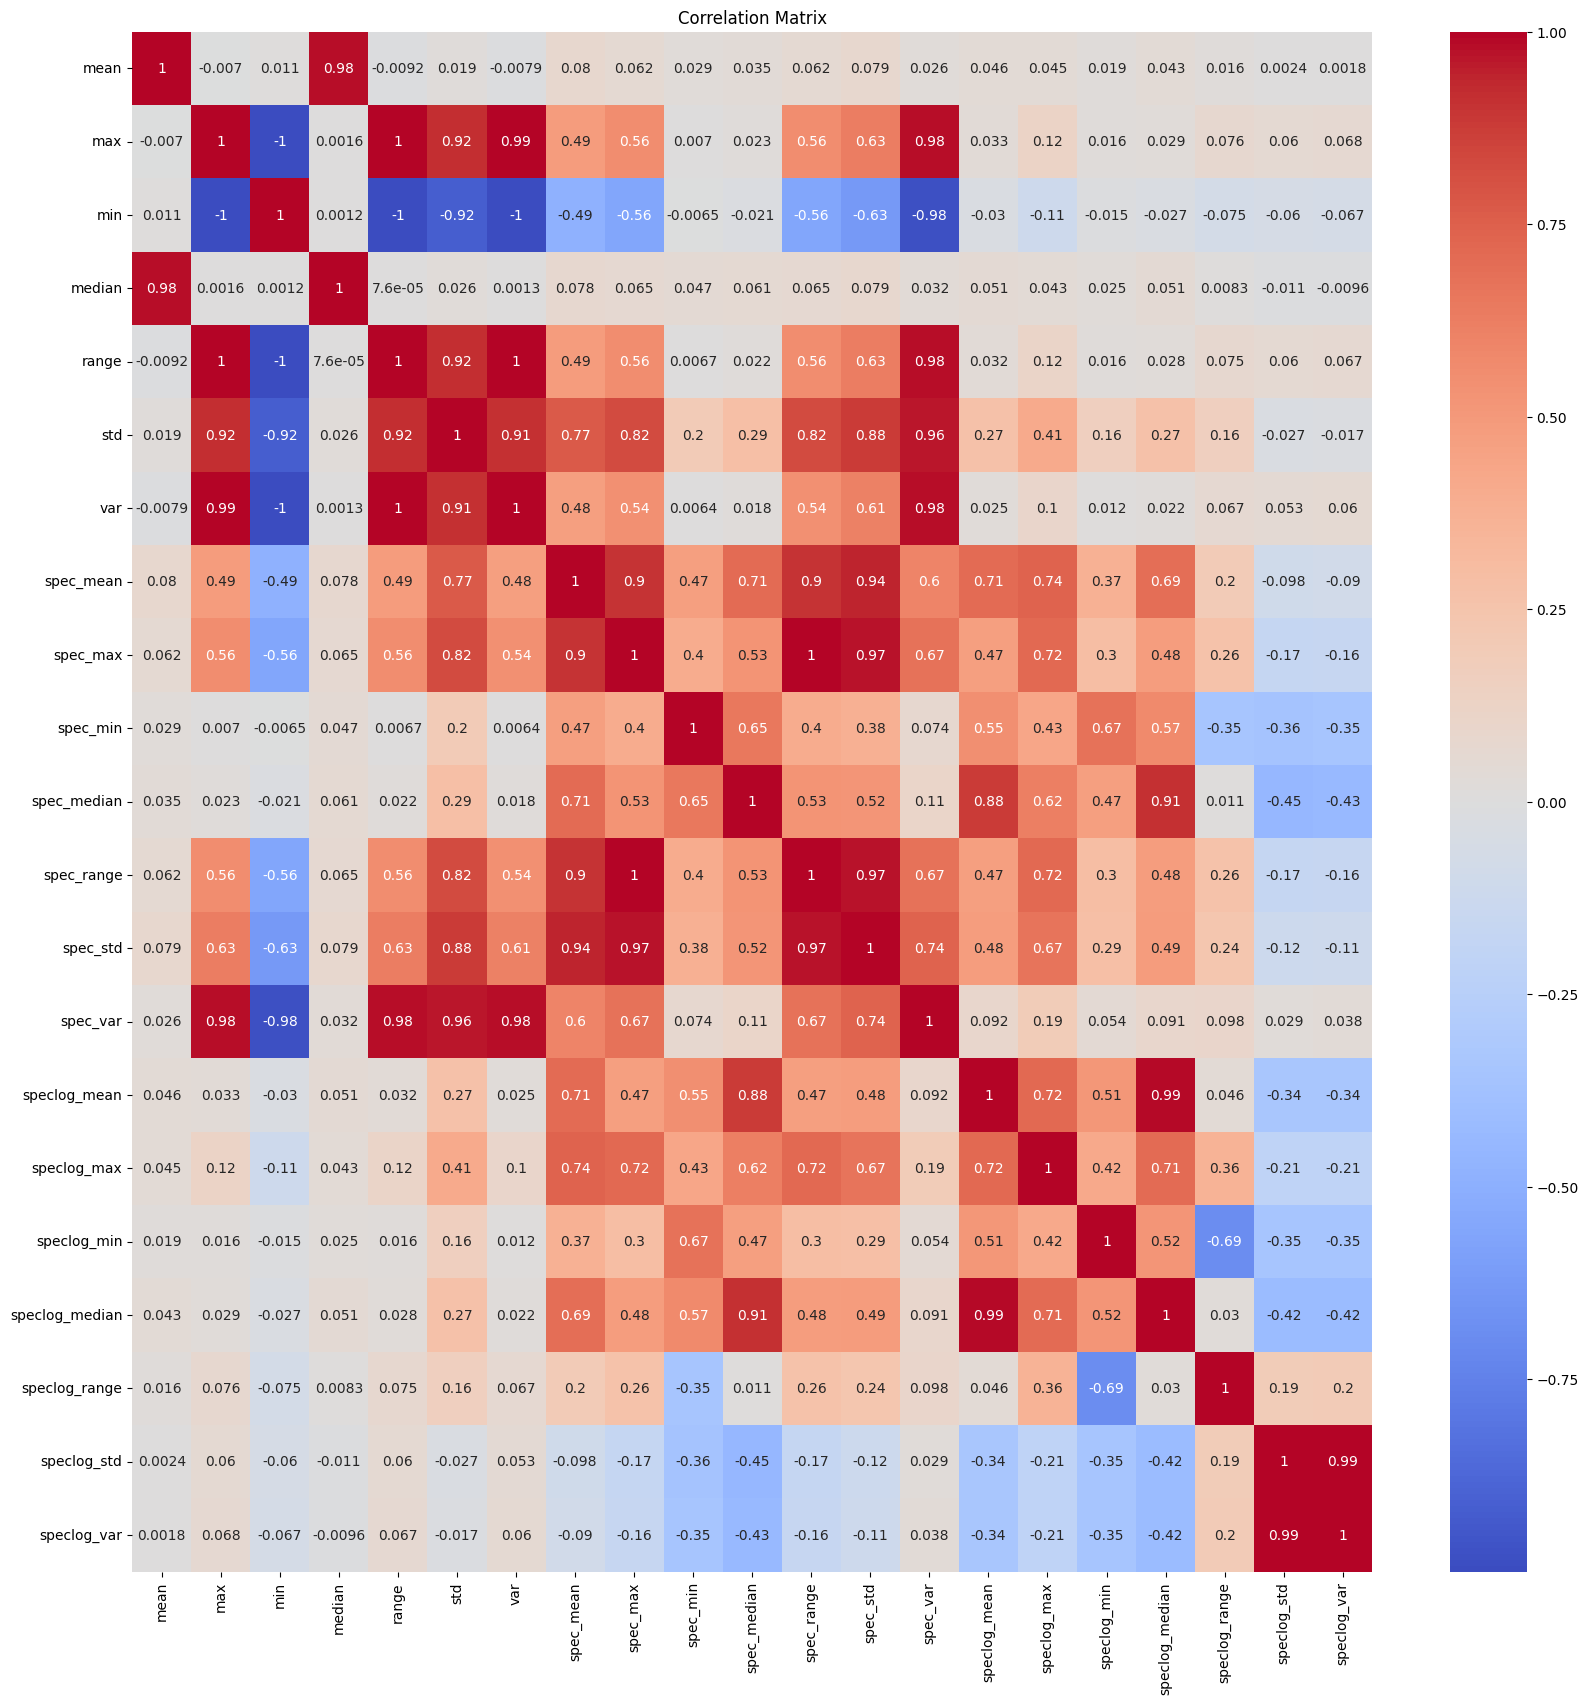

In [7]:
#cross correlation map to look at which stats might be redundant
plt.figure(figsize=(20,20))
sns.heatmap(df.drop(columns=['state']).corr(), cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Matrix');

Most immediately, the variances, stds, and ranges all seem to be highly correlated. But there are numerous seemingly independent variables.

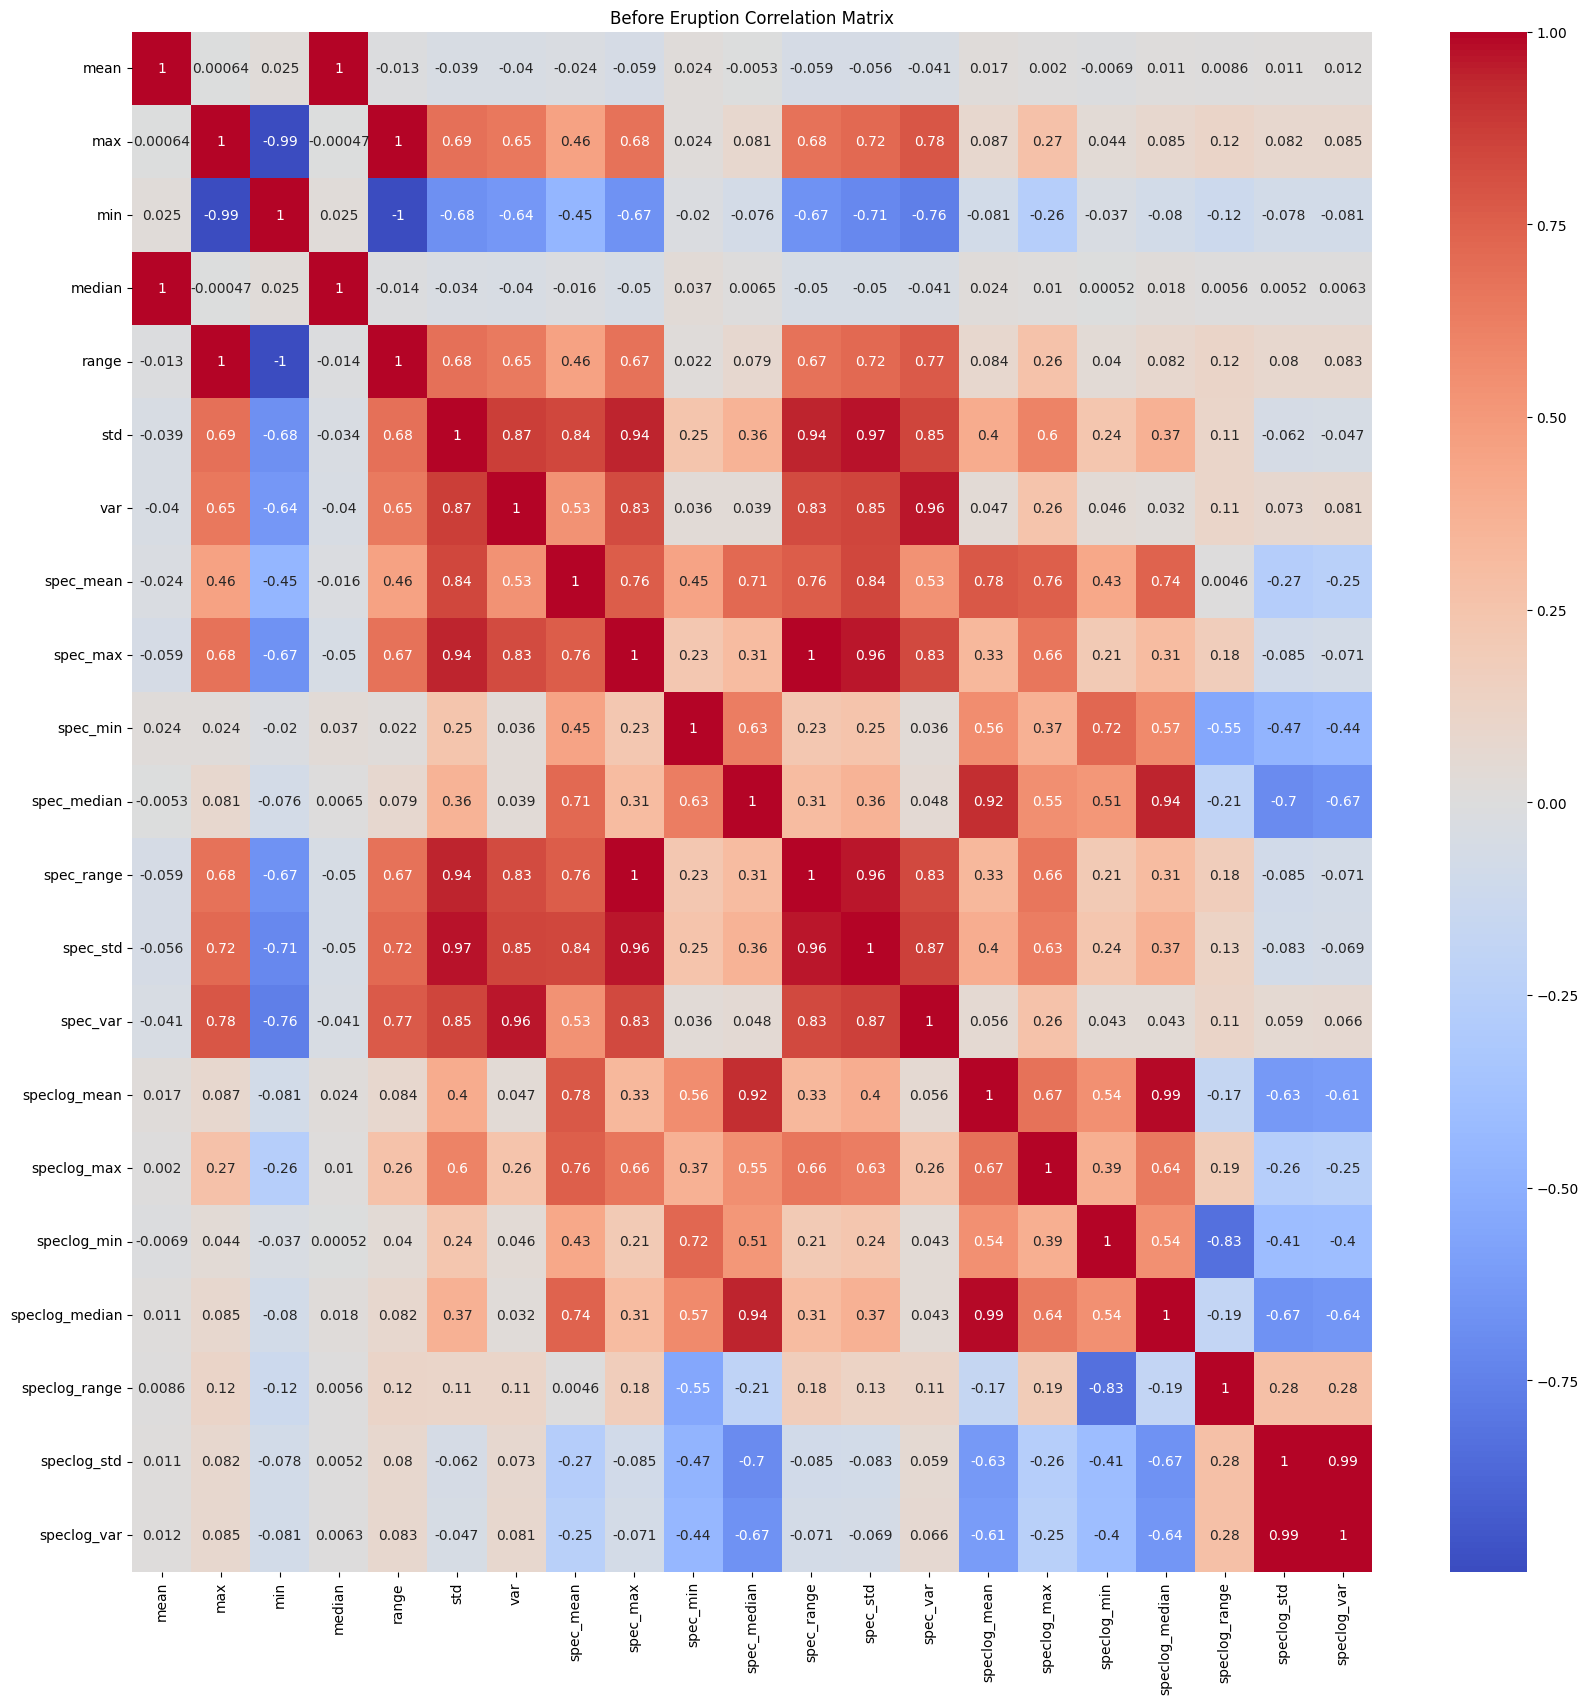

In [8]:
#cross correlation map to look at which stats might be redundant
before_df = df.query('state == "before"')

plt.figure(figsize=(20,20))
sns.heatmap(before_df.drop(columns=['state']).corr(), cmap='coolwarm', center=0, annot=True)
plt.title('Before Eruption Correlation Matrix');

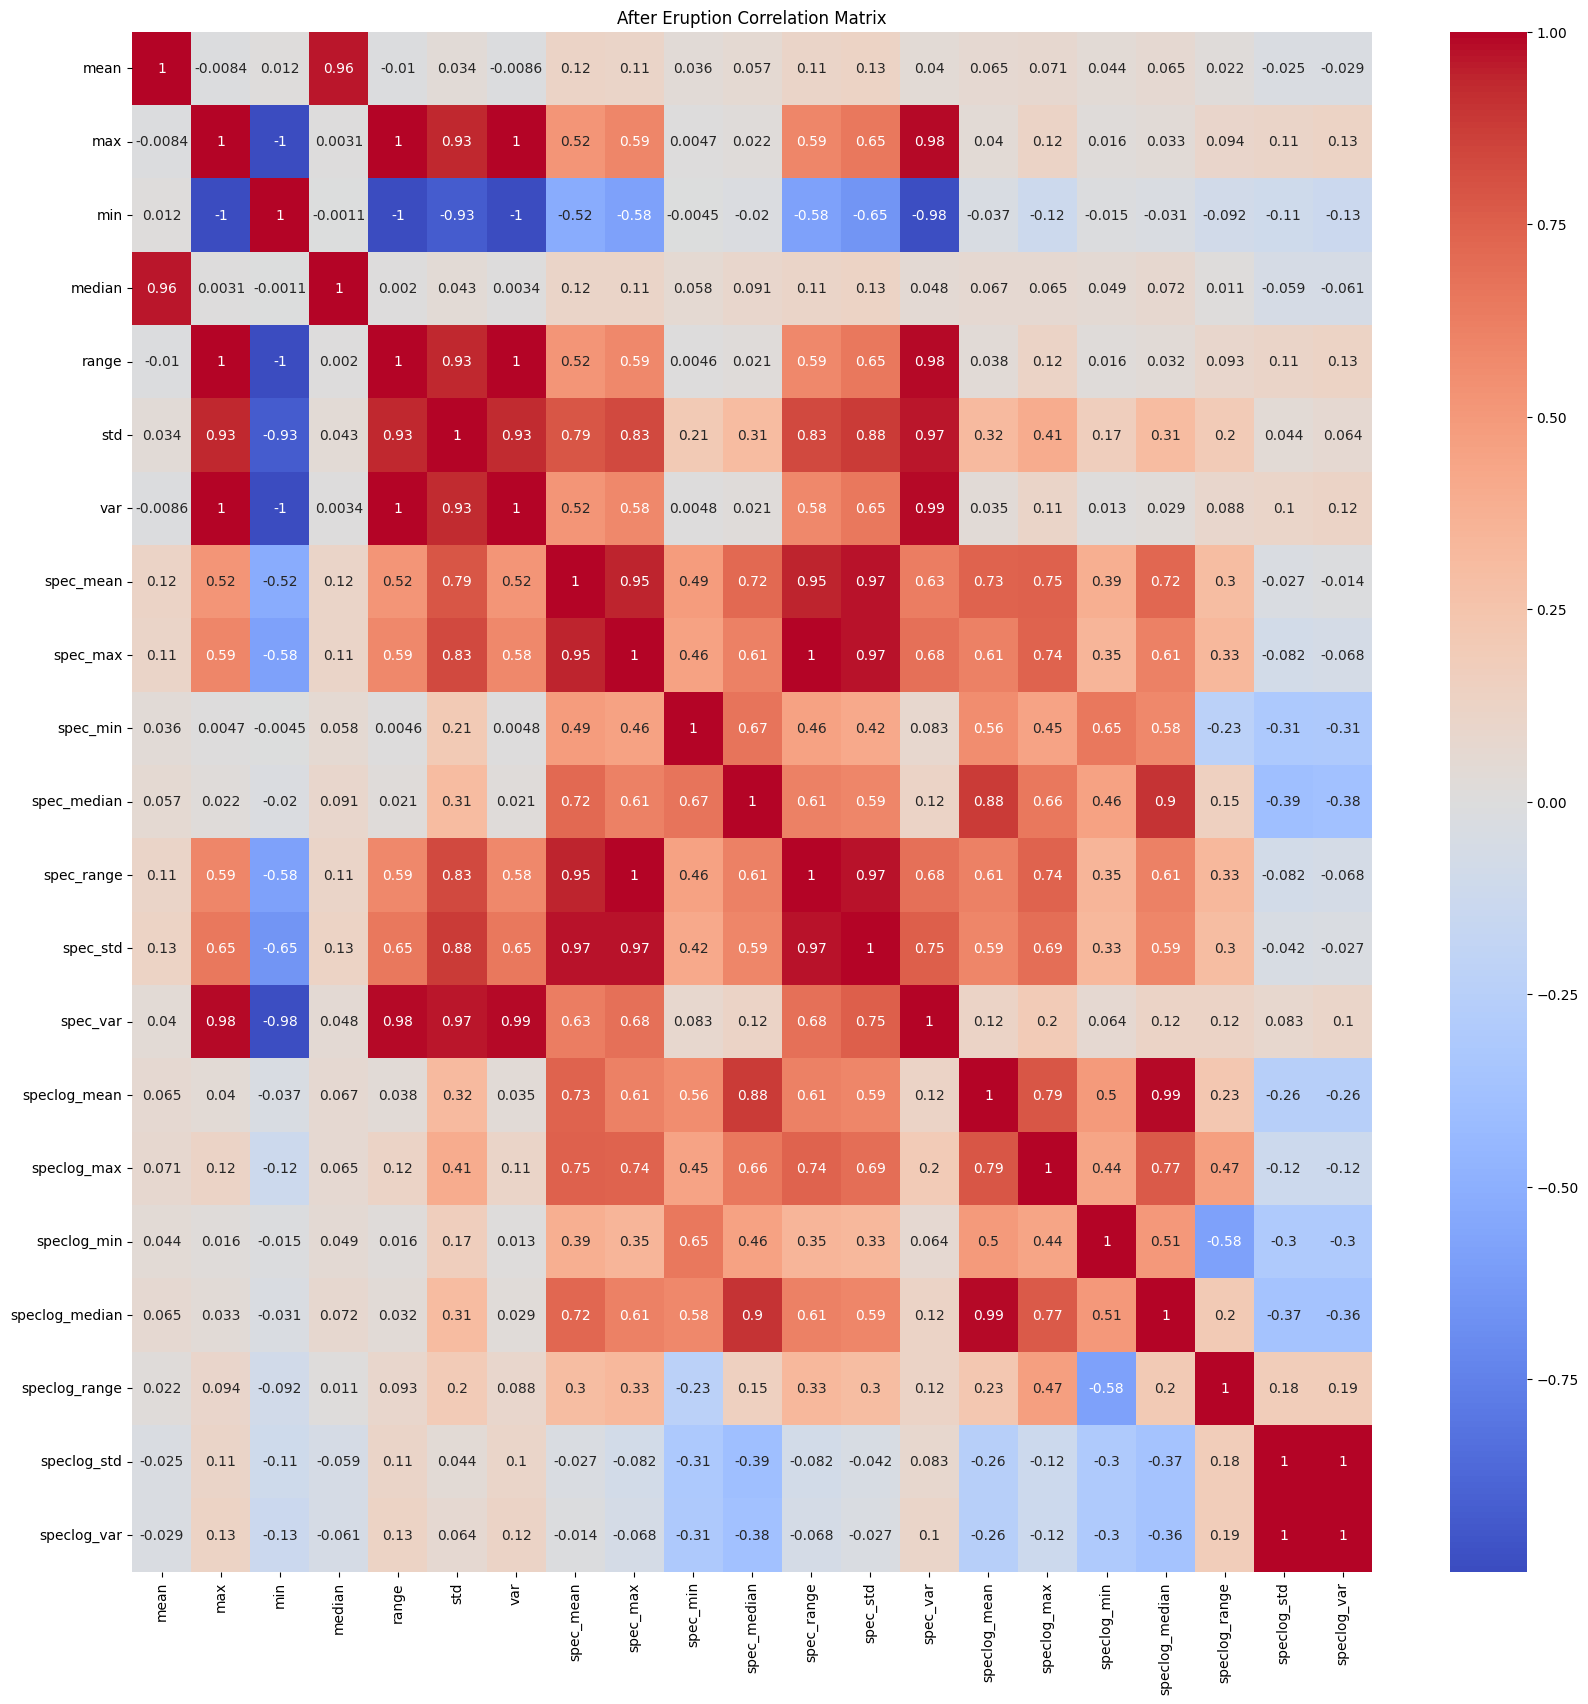

In [9]:
#cross correlation map to look at which stats might be redundant
after_df = df.query('state == "after"')

plt.figure(figsize=(20,20))
sns.heatmap(after_df.drop(columns=['state']).corr(), cmap='coolwarm', center=0, annot=True)
plt.title('After Eruption Correlation Matrix');

#### Doing PCA

[0.429831   0.66443608 0.76549216 0.8576435  0.92236317 0.95842178
 0.97785841 0.99153554 0.99518128 0.99744937 0.99843803 0.9989302
 0.99934847 0.99962951 0.99980522 0.99991512 0.99999151 1.
 1.         1.         1.        ]


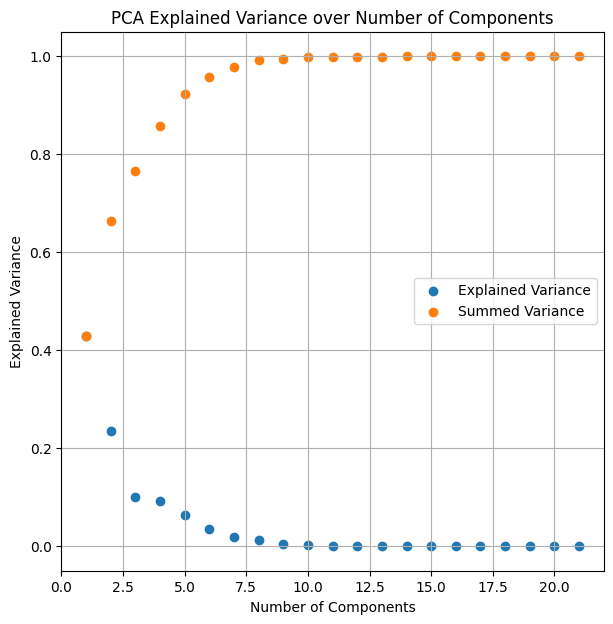

In [10]:
#standardize variable values
variables = df.keys()[0:-1]
scaler = StandardScaler()
scaled_wl = scaler.fit_transform(df_ready[variables])

#Doing PCA on Wavelength Columns
pca = PCA()
pca.fit(scaled_wl)

#plot explained variances
y = pca.explained_variance_ratio_
pca_sum = np.cumsum(y)
x = np.arange(len(y)) + 1
plt.figure(figsize=(7,7))
plt.scatter(x, y, label='Explained Variance')
plt.scatter(x, pca_sum, label='Summed Variance')
plt.title('PCA Explained Variance over Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.legend()
plt.grid()
print(pca_sum);

Results: The first 6 components account for >95% of the variance in the data, those are what will be used in the following modeling.

#### Dimensionality Reduction Based off of PCA

In [11]:
#Doing PCA using 6 components
pca = PCA(n_components=6)
volcano_pca = pca.fit_transform(scaled_wl)
print(volcano_pca)

[[ 0.04965516 -0.50420376  0.04039515 -0.12270911  0.225059   -0.50358056]
 [ 0.45902507 -1.10476344 -0.66886367 -0.1984328   0.9004084  -0.32349344]
 [ 0.76960048 -1.44264561 -0.665426   -0.08206149  0.65570369 -0.33415656]
 ...
 [-1.59760307  0.39475316 -2.50908103  1.71764213 -1.15466501  1.63004176]
 [-1.44914406  0.70171135 -1.3871602   0.77339067 -2.31210927  1.50134327]
 [-1.53984825  0.60829122 -1.90877843  1.24514728 -1.62153782  1.44972948]]


In [12]:
#creating dataframe with PC axes, and saving separate state label list
true_labels = df_ready.state
df_final = pd.DataFrame(columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
df_final['pc1'] = volcano_pca[:,0]
df_final['pc2'] = volcano_pca[:,1]
df_final['pc3'] = volcano_pca[:,2]
df_final['pc4'] = volcano_pca[:,3]
df_final['pc5'] = volcano_pca[:,4]
df_final['pc6'] = volcano_pca[:,5]

df_final.head(3)

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.049655,-0.504204,0.040395,-0.122709,0.225059,-0.503581
1,0.459025,-1.104763,-0.668864,-0.198433,0.900408,-0.323493
2,0.769600,-1.442646,-0.665426,-0.082061,0.655704,-0.334157


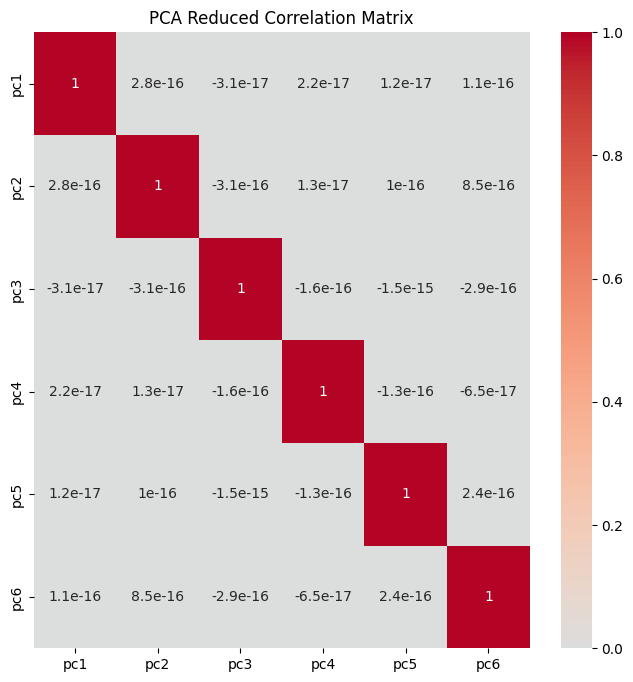

In [13]:
#Cross Correlation Matrix with Reduced Dimensions
plt.figure(figsize=(8,8))
sns.heatmap(df_final.corr(), cmap='coolwarm', center=0, annot=True)
plt.title('PCA Reduced Correlation Matrix');

As desired, the principle components are almost entirely uncorrelated with each other.<br>
Below, look at which original variables contributed most to these first 6 principal components.

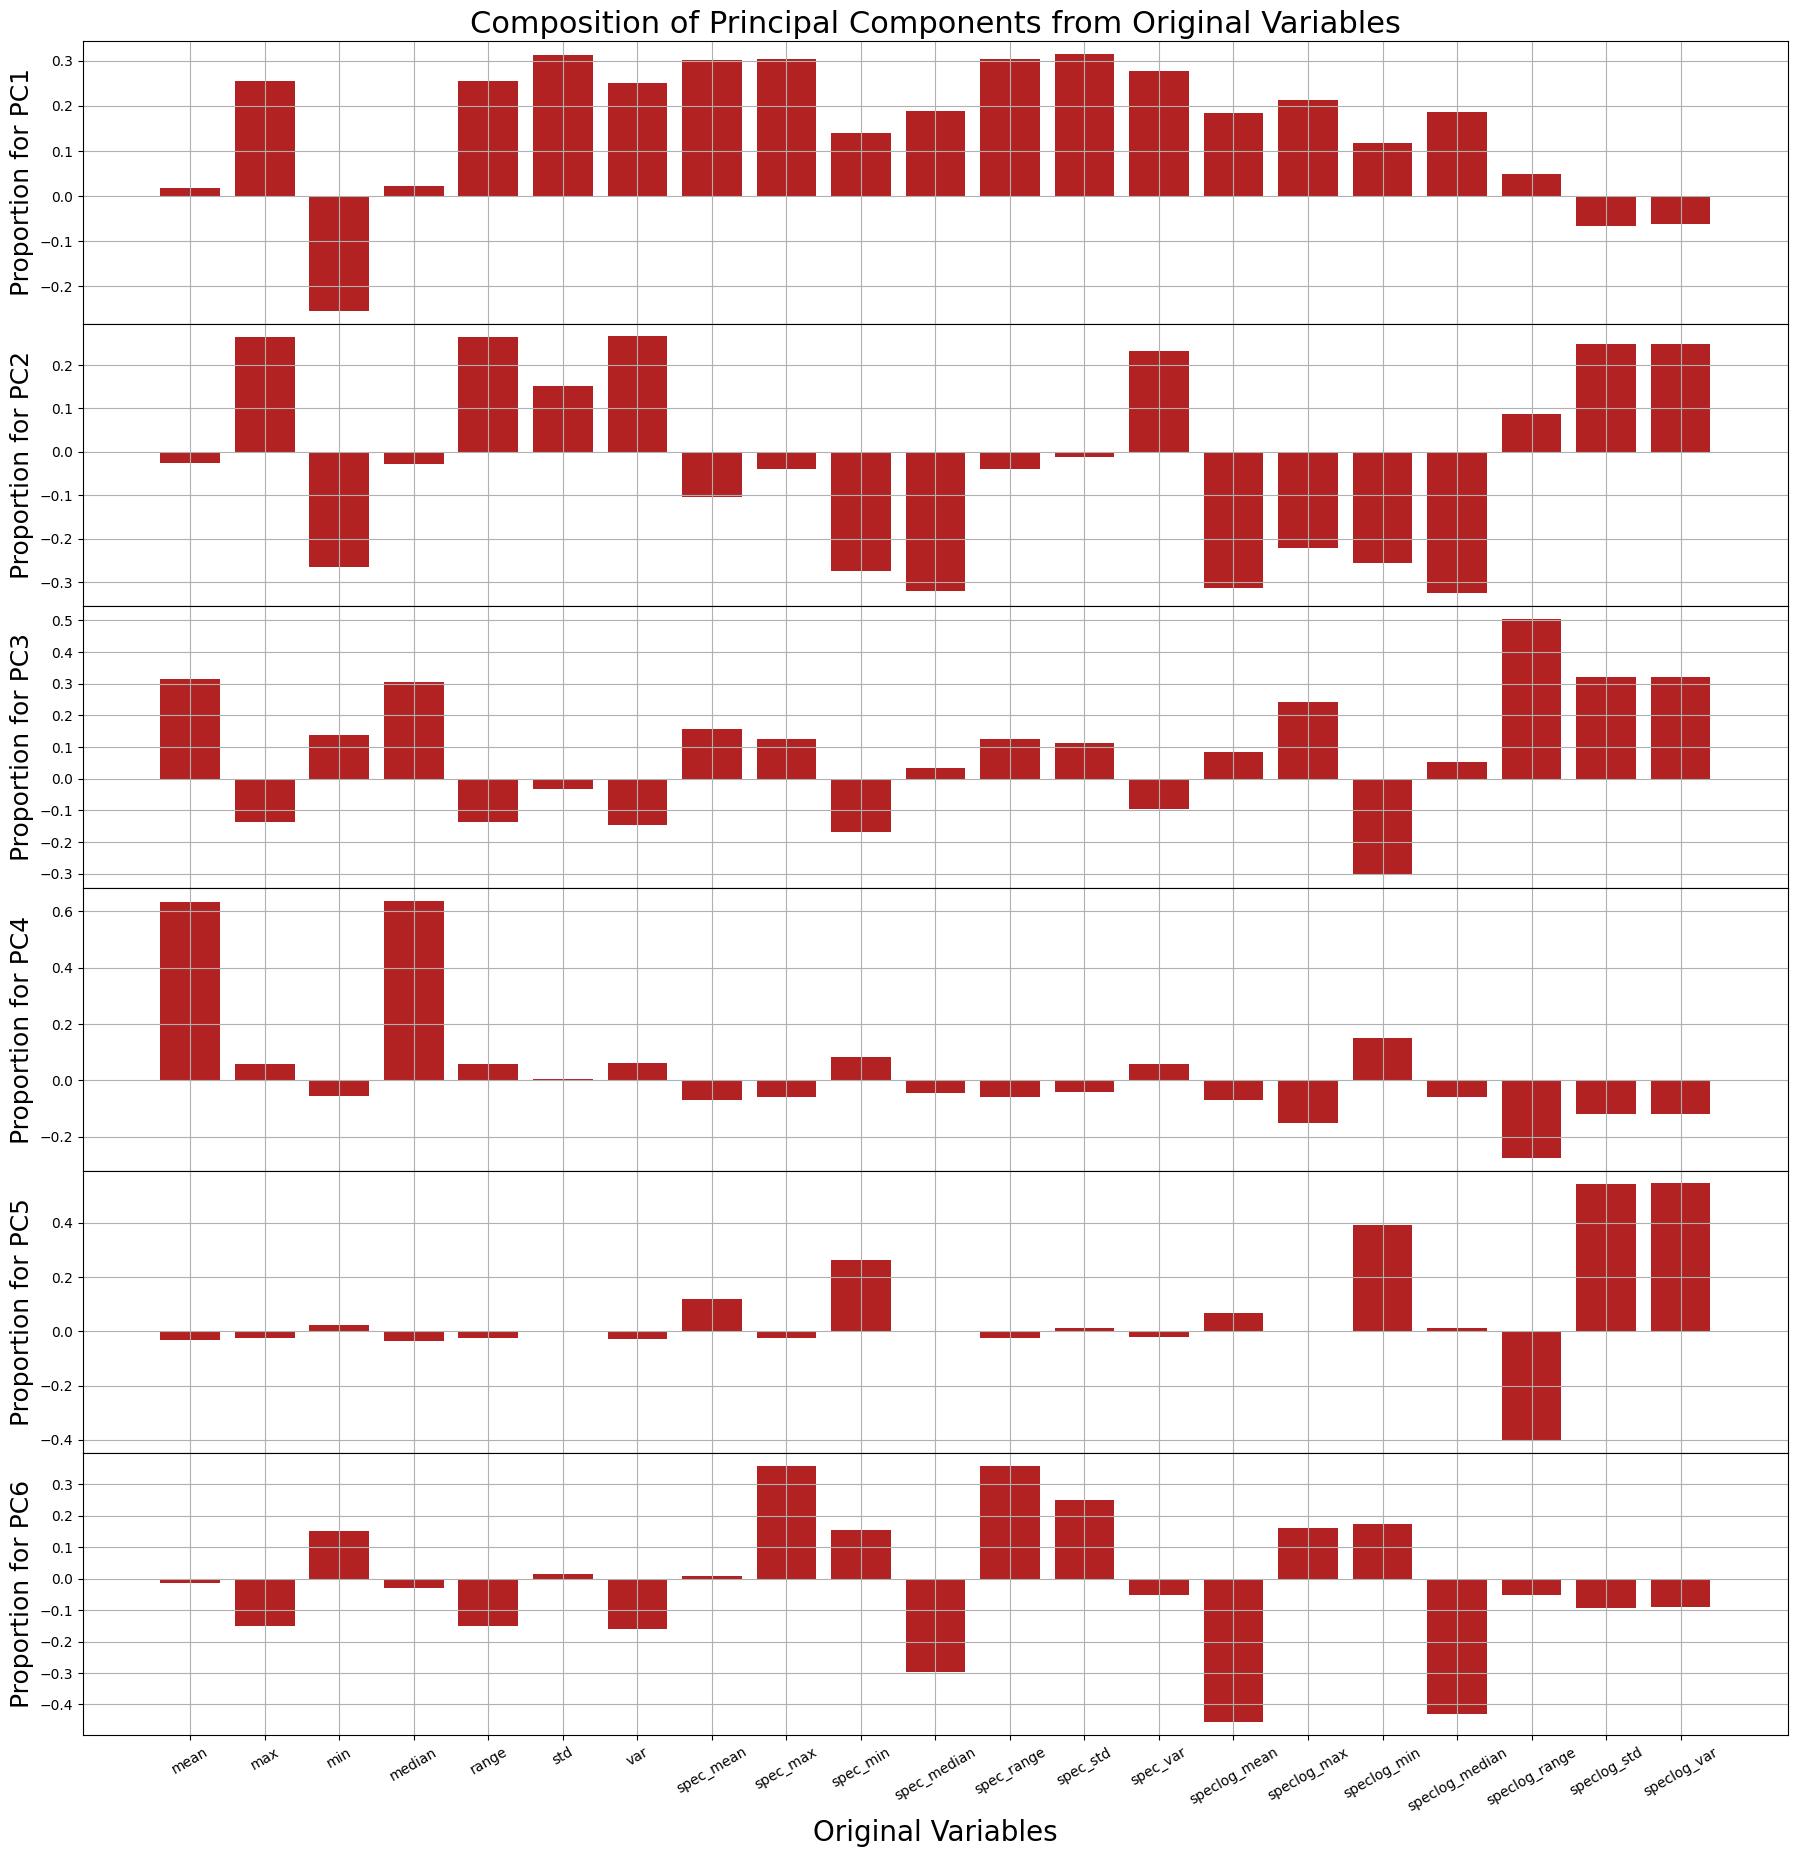

In [14]:
labels = df_ready.drop(columns=['state']).keys()

fig, axs = plt.subplots(ncols=1, nrows=len(pca.components_),sharex=True)
fig.set_size_inches(22,22)

for i in range(len(pca.components_)):
    axs[i].bar(labels, pca.components_[i], color='firebrick')
    axs[i].set_ylabel('Proportion for PC'+str(i+1))
    axs[i].yaxis.label.set_size(18)
    axs[i].grid()

axs[i].tick_params(axis='x', labelrotation=30)
plt.subplots_adjust(hspace=0)
axs[0].set_title('Composition of Principal Components from Original Variables')
axs[0].title.set_size(22)
axs[-1].set_xlabel('Original Variables')
axs[-1].xaxis.label.set_size(20);

### Machine Learning Models

For each model an initial run with default parameters is done, followed by hyperparameter tuning and a rerun with the ideal parameters. <br><br>

Within the hyperparameter tuning, sklearn performs cross-fold validation, which is set in this notebook to the default of 5.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# classifiers from sklearns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [16]:
#set up data and true labels again
X = scaler.fit_transform(df_final)
Y = true_labels

#same features list
features = df_final.keys().to_numpy()
features

array(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'], dtype=object)

In [17]:
#split into train and test sets, chose 80/20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#### K Nearest Neighbors
------------

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       238
           1       0.83      0.86      0.85       242

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



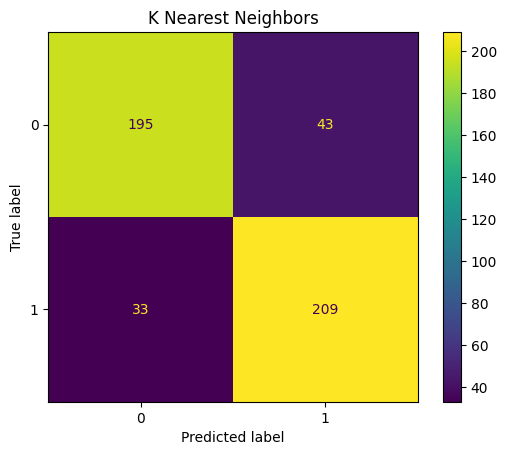

In [18]:
#Model definition
knn = KNeighborsClassifier()

#Training
knn.fit(X_train, Y_train)

#Prediction on Test
Y_pred = knn.predict(X_test)

#Evaluation: classification report, save precision, recall, fscore, and accuracy
print(classification_report(Y_test, Y_pred))
knn_dict = classification_report(Y_test, Y_pred, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot()
plt.title('K Nearest Neighbors');

In [19]:
#define parameter grid
param_grid = {'n_neighbors':np.arange(2,15,1)}

#Run grid search and print optimal settings
grid_search = GridSearchCV(KNeighborsClassifier(), 
                           param_grid=param_grid, cv=5) 
grid_search.fit(X_train, Y_train) 
print(grid_search.best_params_) 

{'n_neighbors': 14}


              precision    recall  f1-score   support

           0       0.81      0.84      0.82       231
           1       0.84      0.82      0.83       249

    accuracy                           0.83       480
   macro avg       0.83      0.83      0.83       480
weighted avg       0.83      0.83      0.83       480



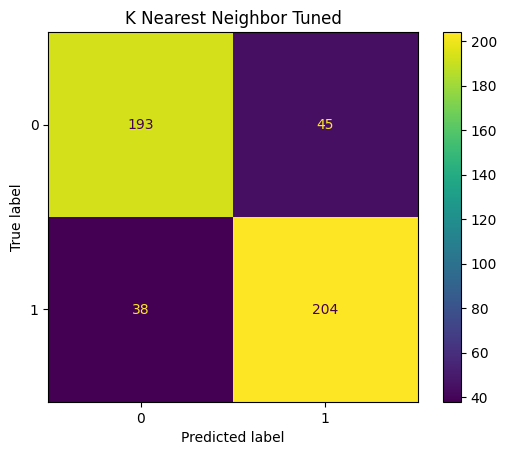

In [31]:
#use ideal parameters and test model
knn_tuned = KNeighborsClassifier(n_neighbors=14) 
knn_tuned.fit(X_train, Y_train) 
y_pred_grid = knn_tuned.predict(X_test) 
print(classification_report(y_pred_grid, Y_test))

knn_dict = classification_report(Y_test, y_pred_grid, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred_grid)).plot()
plt.title('K Nearest Neighbor Tuned');

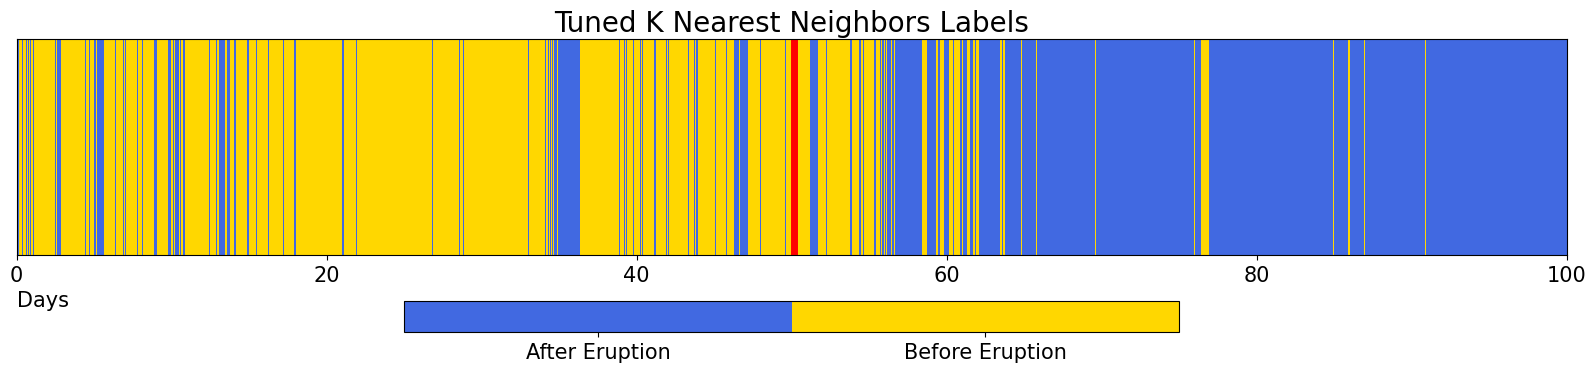

In [200]:
#plot model's predictions over whole time series
times = np.arange(len(df_final)+1) / 24 #time in days
ys = np.array([0,1])
predictions = knn_tuned.predict(df_final.to_numpy()).reshape((1,len(df_final)))
legends = ['After', 'Before']

#find eruption index (where values switch from 1 to 0)
eruption_index = np.where(np.roll(true_labels,1)!=true_labels)[0][1]
eruption_index /= 24

cmap = ListedColormap(['royalblue', 'gold'])
fig, ax = plt.subplots()
fig.set_size_inches((20,4))

cax = ax.pcolormesh(times, ys, predictions, cmap=cmap, zorder=0)
ax.axvline(eruption_index, zorder=1, c='r', lw=5, mec='k')
cbar = fig.colorbar(cax, location='bottom', aspect=25, ticks=[0,1], shrink=0.5)

ax.set_title('Tuned K Nearest Neighbors Labels', fontsize=20)
ax.set_xlabel('Days', loc='left', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
cbar.set_ticks(ticks=[0.25,0.75], labels=['After Eruption', 'Before Eruption'], fontsize=15);

#### Random Forest
-----------

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       238
           1       0.84      0.89      0.86       242

    accuracy                           0.86       480
   macro avg       0.86      0.86      0.86       480
weighted avg       0.86      0.86      0.86       480



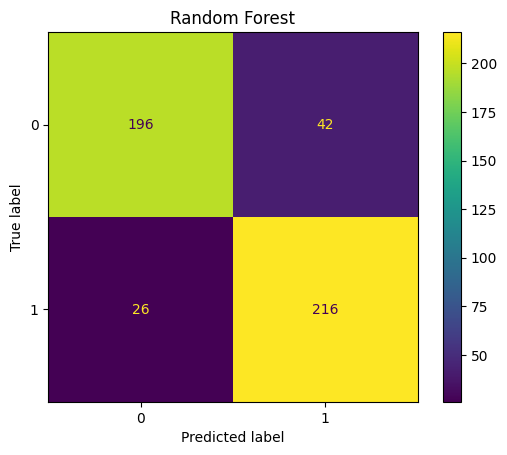

In [21]:
#Model definition
rf = RandomForestClassifier()

#Training
rf.fit(X_train, Y_train)

#Prediction on Test
Y_pred = rf.predict(X_test)

#Evaluation: classification report, save precision, recall, fscore, and accuracy
print(classification_report(Y_test, Y_pred))
rf_dict = classification_report(Y_test, Y_pred, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot()
plt.title('Random Forest');

In [22]:
#define parameter grid
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9, 12], 
    'max_leaf_nodes': [3, 6, 9, 12]}

#Run grid search and print optimal settings
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid, cv=5) 
grid_search.fit(X_train, Y_train) 
print(grid_search.best_params_) 

{'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 12, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.77      0.87      0.82       211
           1       0.89      0.80      0.84       269

    accuracy                           0.83       480
   macro avg       0.83      0.84      0.83       480
weighted avg       0.84      0.83      0.83       480



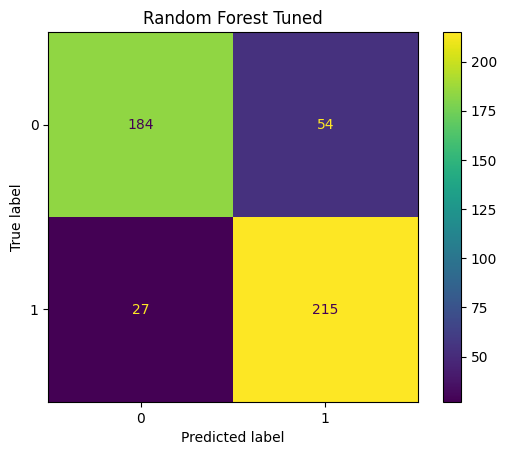

In [32]:
#use ideal parameters and test model
rf_tuned = RandomForestClassifier(max_depth=12, 
                                    max_features="log2", 
                                    max_leaf_nodes=12, 
                                    n_estimators=50) 
rf_tuned.fit(X_train, Y_train) 
y_pred_grid = rf_tuned.predict(X_test) 
print(classification_report(y_pred_grid, Y_test)) 

rf_dict = classification_report(Y_test, y_pred_grid, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred_grid)).plot()
plt.title('Random Forest Tuned');

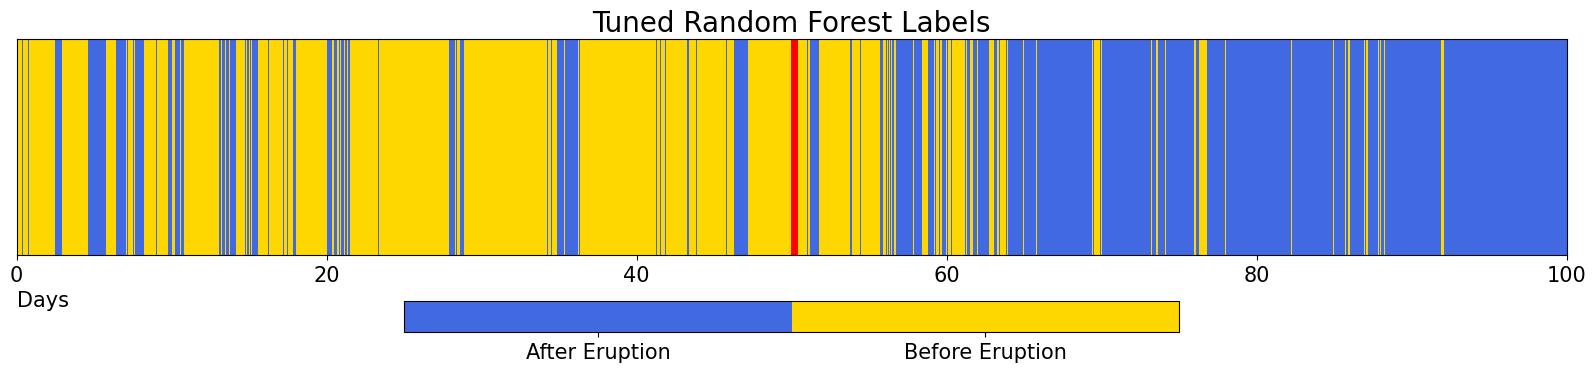

In [199]:
#plot model's predictions over whole time series
times = np.arange(len(df_final)+1) / 24 #time in days
ys = np.array([0,1])
predictions = rf_tuned.predict(df_final.to_numpy()).reshape((1,len(df_final)))
legends = ['After', 'Before']

#find eruption index (where values switch from 1 to 0)
eruption_index = np.where(np.roll(true_labels,1)!=true_labels)[0][1]
eruption_index /= 24

cmap = ListedColormap(['royalblue', 'gold'])
fig, ax = plt.subplots()
fig.set_size_inches((20,4))

cax = ax.pcolormesh(times, ys, predictions, cmap=cmap, zorder=0)
ax.axvline(eruption_index, zorder=1, c='r', lw=5, mec='k')
cbar = fig.colorbar(cax, location='bottom', aspect=25, ticks=[0,1], shrink=0.5)

ax.set_title('Tuned Random Forest Labels', fontsize=20)
ax.set_xlabel('Days', loc='left', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
cbar.set_ticks(ticks=[0.25,0.75], labels=['After Eruption', 'Before Eruption'], fontsize=15);

#### Gaussian Naive Bayes
-----------

              precision    recall  f1-score   support

           0       0.82      0.53      0.64       238
           1       0.66      0.89      0.76       242

    accuracy                           0.71       480
   macro avg       0.74      0.71      0.70       480
weighted avg       0.74      0.71      0.70       480



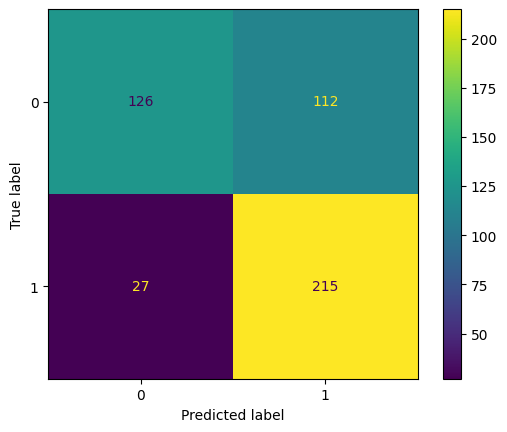

In [24]:
#Model definition
gnb = GaussianNB()

#Training
gnb.fit(X_train, Y_train)

#Prediction on Test
Y_pred = gnb.predict(X_test)

#Evaluation: classification report, save precision, recall, fscore, and accuracy
print(classification_report(Y_test, Y_pred))
gnb_dict = classification_report(Y_test, Y_pred, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot()

In [25]:
#define parameter grid
param_grid = {'var_smoothing':np.logspace(-1,-10, num=100)}

#Run grid search and print optimal settings
grid_search = GridSearchCV(GaussianNB(), 
                           param_grid=param_grid, cv=5) 
grid_search.fit(X_train, Y_train) 
print(grid_search.best_params_)

{'var_smoothing': 0.002310129700083158}


              precision    recall  f1-score   support

           0       0.53      0.82      0.64       153
           1       0.89      0.66      0.76       327

    accuracy                           0.71       480
   macro avg       0.71      0.74      0.70       480
weighted avg       0.77      0.71      0.72       480



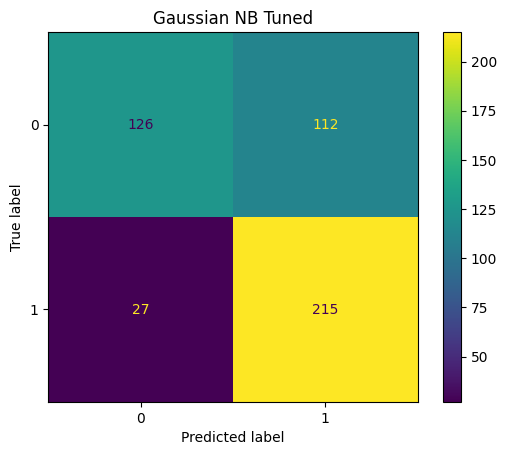

In [40]:
#use ideal parameters and test model
gnb_tuned = GaussianNB(var_smoothing=0.002310129700083158) 
gnb_tuned.fit(X_train, Y_train) 
y_pred_grid = gnb_tuned.predict(X_test) 
print(classification_report(y_pred_grid, Y_test)) 

gnb_dict = classification_report(Y_test, y_pred_grid, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred_grid)).plot()
plt.title('Gaussian NB Tuned');

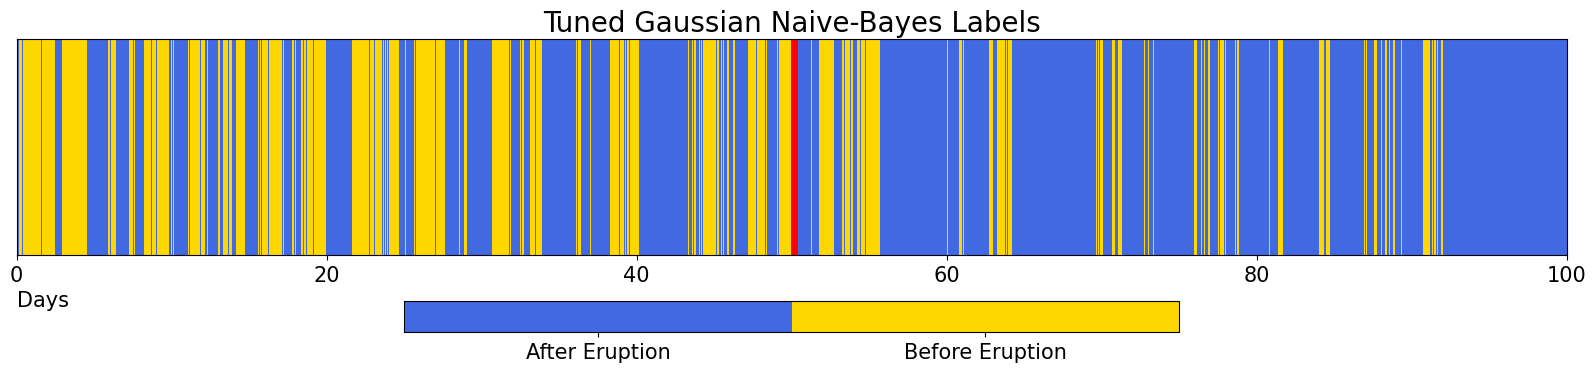

In [201]:
#plot model's predictions over whole time series
times = np.arange(len(df_final)+1) / 24 #time in days
ys = np.array([0,1])
predictions = gnb_tuned.predict(df_final.to_numpy()).reshape((1,len(df_final)))
legends = ['After', 'Before']

#find eruption index (where values switch from 1 to 0)
eruption_index = np.where(np.roll(true_labels,1)!=true_labels)[0][1]
eruption_index /= 24

cmap = ListedColormap(['royalblue', 'gold'])
fig, ax = plt.subplots()
fig.set_size_inches((20,4))

cax = ax.pcolormesh(times, ys, predictions, cmap=cmap, zorder=0)
ax.axvline(eruption_index, zorder=1, c='r', lw=5, mec='k')
cbar = fig.colorbar(cax, location='bottom', aspect=25, ticks=[0,1], shrink=0.5)

ax.set_title('Tuned Gaussian Naive-Bayes Labels', fontsize=20)
ax.set_xlabel('Days', loc='left', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
cbar.set_ticks(ticks=[0.25,0.75], labels=['After Eruption', 'Before Eruption'], fontsize=15);

#### Support Vector Machine
-----------

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       238
           1       0.80      0.86      0.83       242

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480



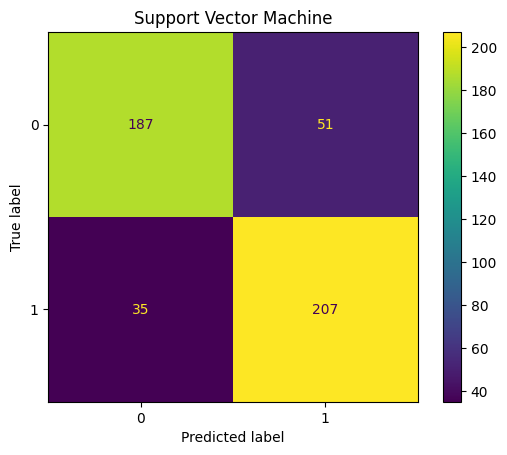

In [27]:
#Model definition
svm = SVC()

#Training
svm.fit(X_train, Y_train)

#Prediction on Test
Y_pred = svm.predict(X_test)

#Evaluation: classification report, save precision, recall, fscore, and accuracy
print(classification_report(Y_test, Y_pred))
svm_dict = classification_report(Y_test, Y_pred, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot()
plt.title('Support Vector Machine');

In [28]:
#define parameter grid
param_grid = {'C': np.logspace(-1, 3, 20),  
              'gamma': np.logspace(0, -4, 20)}

#Run grid search and print optimal settings
grid_search = GridSearchCV(SVC(), 
                           param_grid=param_grid, cv=5) 
grid_search.fit(X_train, Y_train) 
print(grid_search.best_params_)

{'C': 1.8329807108324356, 'gamma': 1.0}


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       230
           1       0.86      0.84      0.85       250

    accuracy                           0.85       480
   macro avg       0.85      0.85      0.85       480
weighted avg       0.85      0.85      0.85       480



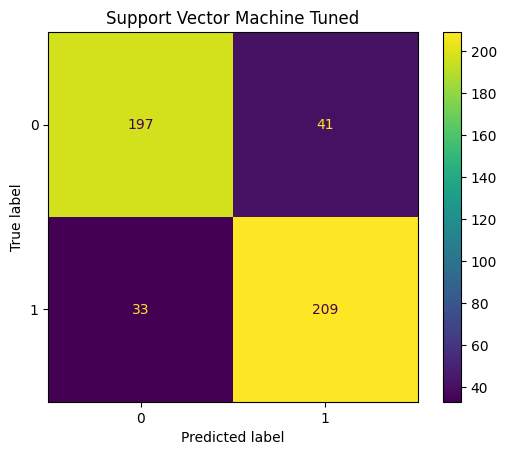

In [41]:
#use ideal parameters and test model
svm_tuned = SVC(C=1.8329807108324356,
                 gamma=1) 
svm_tuned.fit(X_train, Y_train) 
y_pred_grid = svm_tuned.predict(X_test) 
print(classification_report(y_pred_grid, Y_test)) 

svm_dict = classification_report(Y_test, y_pred_grid, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred_grid)).plot()
plt.title('Support Vector Machine Tuned');

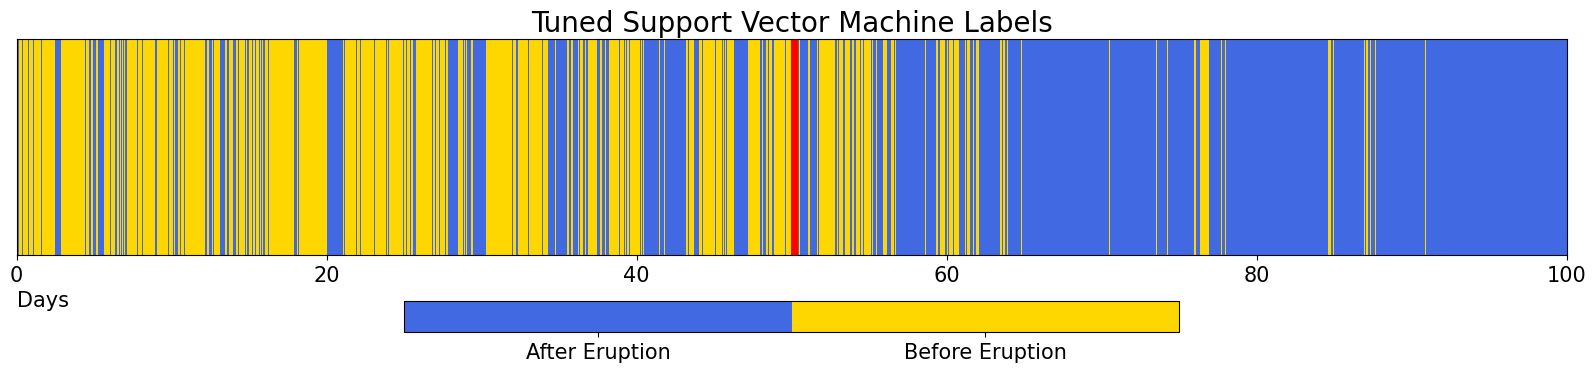

In [202]:
#plot model's predictions over whole time series
times = np.arange(len(df_final)+1) / 24 #time in days
ys = np.array([0,1])
predictions = svm_tuned.predict(df_final.to_numpy()).reshape((1,len(df_final)))
legends = ['After', 'Before']

#find eruption index (where values switch from 1 to 0)
eruption_index = np.where(np.roll(true_labels,1)!=true_labels)[0][1]
eruption_index /= 24

cmap = ListedColormap(['royalblue', 'gold'])
fig, ax = plt.subplots()
fig.set_size_inches((20,4))

cax = ax.pcolormesh(times, ys, predictions, cmap=cmap, zorder=0)
ax.axvline(eruption_index, zorder=1, c='r', lw=5, mec='k')
cbar = fig.colorbar(cax, location='bottom', aspect=25, ticks=[0,1], shrink=0.5)

ax.set_title('Tuned Support Vector Machine Labels', fontsize=20)
ax.set_xlabel('Days', loc='left', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
cbar.set_ticks(ticks=[0.25,0.75], labels=['After Eruption', 'Before Eruption'], fontsize=15);

In [ ]:
# List of model dictionaries and their names
models = {
    "KNN": knn_dict,
    "Random Forest": rf_dict,
    "Naive Bayes": gnb_dict,
    "SVM": svm_dict
}

# Initialize DataFrame for metrics comparison
comparison_data = []

# Extract metrics for each model
for model_name, model_dict in models.items():
    for key, metrics in model_dict.items():
        if isinstance(metrics, dict):  # Ignore "accuracy" as it's not a dict
            comparison_data.append({
                "Class": key,
                "Model": model_name,
                "Precision": metrics.get("precision", 0),
                "Recall": metrics.get("recall", 0),
                "F1-Score": metrics.get("f1-score", 0),
                "Support": metrics.get("support", 0)
            })
        elif key == "accuracy":
            comparison_data.append({
                "Class": "accuracy",
                "Model": model_name,
                "Precision": metrics,
                "Recall": metrics,
                "F1-Score": metrics,
                "Support": 0
            })

# Group by model

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Pivot the DataFrame to group by model
model_pivot_df = comparison_df.pivot(index="Model", columns="Class", values=["Precision", "Recall", "F1-Score"])

# Plot the metrics grouped by model
model_pivot_df.plot(kind="bar", figsize=(12, 8))
plt.title("Performance Metrics Grouped by Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metric and Class", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


# Alternatively you can group by class
# # Create DataFrame
# comparison_df = pd.DataFrame(comparison_data)

# # Pivot the DataFrame for better visualization
# pivot_df = comparison_df.pivot(index="Class", columns="Model", values=["Precision", "Recall", "F1-Score"])

# # Display the DataFrame
# print(pivot_df)

# # Optional: Visualization
# pivot_df.plot(kind="bar", figsize=(12, 8))
# plt.title("Model Performance Comparison")
# plt.ylabel("Score")
# plt.xticks(rotation=45)
# plt.legend(title="Metric and Model", loc="upper left", bbox_to_anchor=(1.05, 1))
# plt.tight_layout()
# plt.show()

### Results

The tuned KNN, Random Forest, and Support Vector Machine all had similar performances, with F1 scores ~0.84. All else being equal, the Random Forest is the model which provides the most insight into its operation. Below, the importance of each principal component will be visualized

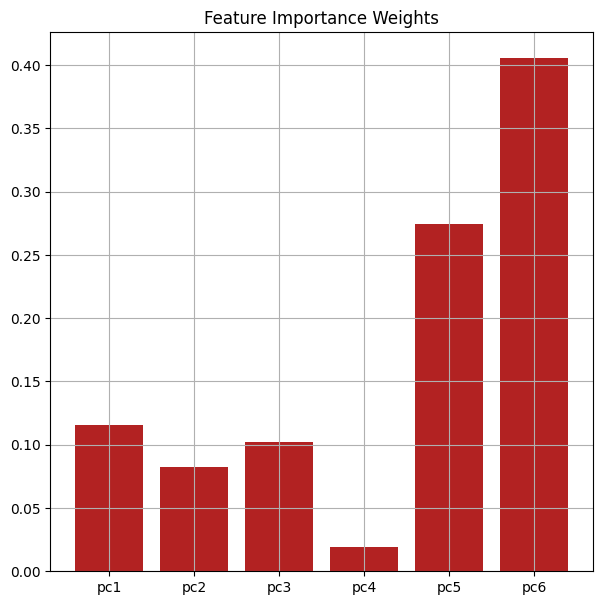

In [42]:
importances = rf_tuned.feature_importances_

plt.figure(figsize=(7,7))
plt.bar(np.arange(len(importances))+1, importances, color='firebrick')
plt.xticks(np.arange(len(importances))+1, features)
plt.title('Feature Importance Weights')
plt.grid();

### Discussion
PC5 and PC6 are by far the most important in the Random Forest Model. Both PC5 and PC6 include predominately spectrogram and log spectrogram characteristics, and account for much less of the data's overall variability than the first 4 principal components. This implies that there is are some key frequency/spectral characteristics that change following the eruption, with less distinct of a change in the time domain. This makes physical sense, Zali et al. 2024 posited that volcanic tremor was the major seismic signal of volcanic activity, which would produce consistent spectral noise with limited displacement visible in time series data.